In [ ]:
# understand data available

import pandas as pd



# Load physiological_cycles.csv
phys_cycles = pd.read_csv('../Data/physiological_cycles.csv', encoding='ascii')
print('physiological_cycles.csv head:')
print(phys_cycles.head())
print('\
')

# Load sleeps.csv
sleeps = pd.read_csv('../Data/sleeps.csv', encoding='ascii')
print('sleeps.csv head:')
print(sleeps.head())
print('\
')

# Load workouts.csv
workouts = pd.read_csv('../Data/workouts.csv', encoding='ascii')
print('workouts.csv head:')
print(workouts.head())
print('\
')

# Load journal_entries.csv
journal_entries = pd.read_csv('../Data/journal_entries.csv', encoding='ascii')
print('journal_entries.csv head:')
print(journal_entries.head())

physiological_cycles.csv head:
      Cycle start time       Cycle end time Cycle timezone  Recovery score %  \
0  2025-04-07 22:56:24                  NaN      UTC-05:00              79.0   
1  2025-04-06 21:43:12  2025-04-07 22:56:24      UTC-05:00              85.0   
2  2025-04-06 02:32:49  2025-04-06 21:43:12      UTC-05:00              20.0   
3  2025-04-05 03:20:42  2025-04-06 02:32:49      UTC-05:00              20.0   
4  2025-04-03 23:39:30  2025-04-05 03:20:42      UTC-05:00              53.0   

   Resting heart rate (bpm)  Heart rate variability (ms)  Skin temp (celsius)  \
0                      52.0                         80.0                34.20   
1                      51.0                         86.0                33.20   
2                      72.0                         36.0                33.85   
3                      71.0                         37.0                33.84   
4                      55.0                         70.0                33.90   

 

In [9]:
# Physiological cycles data
print("Physiological Cycles Data Info:")
print(phys_cycles.info())
print("\
Missing values in physiological_cycles.csv:")
print(phys_cycles.isnull().sum())
print("\
")

# Sleep data
print("Sleep Data Info:")
print(sleeps.info())
print("\
Missing values in sleeps.csv:")
print(sleeps.isnull().sum())
print("\
")

# Workout data
print("Workout Data Info:")
print(workouts.info())
print("\
Missing values in workouts.csv:")
print(workouts.isnull().sum())
print("\
")

# Journal entries data
print("Journal Entries Data Info:")
print(journal_entries.info())
print("\
Missing values in journal_entries.csv:")
print(journal_entries.isnull().sum())

Physiological Cycles Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             199 non-null    object 
 1   Cycle end time               198 non-null    object 
 2   Cycle timezone               199 non-null    object 
 3   Recovery score %             198 non-null    float64
 4   Resting heart rate (bpm)     198 non-null    float64
 5   Heart rate variability (ms)  198 non-null    float64
 6   Skin temp (celsius)          198 non-null    float64
 7   Blood oxygen %               191 non-null    float64
 8   Day Strain                   198 non-null    float64
 9   Energy burned (cal)          198 non-null    float64
 10  Max HR (bpm)                 198 non-null    float64
 11  Average HR (bpm)             198 non-null    float64
 12  Sleep onset                  198 non-null    o

In [10]:
# First, let's convert the date columns to datetime format for all datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.style.use('seaborn-v0_8-darkgrid')

# Function to convert columns to datetime
def convert_to_datetime(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

datetime_cols_phys = ['Cycle start time', 'Cycle end time', 'Sleep onset', 'Wake onset']
datetime_cols_sleep = ['Cycle start time', 'Cycle end time', 'Sleep onset', 'Wake onset']
datetime_cols_workout = ['Cycle start time', 'Cycle end time', 'Workout start time', 'Workout end time']
datetime_cols_journal = ['Cycle start time', 'Cycle end time']

phys_cycles = convert_to_datetime(phys_cycles, datetime_cols_phys)
sleeps = convert_to_datetime(sleeps, datetime_cols_sleep)
workouts = convert_to_datetime(workouts, datetime_cols_workout)
journal_entries = convert_to_datetime(journal_entries, datetime_cols_journal)

print("Date ranges for each dataset:")
print("\
Physiological Cycles:")
print(f"Start: {phys_cycles['Cycle start time'].min()}")
print(f"End: {phys_cycles['Cycle start time'].max()}")

print("\
Sleeps:")
print(f"Start: {sleeps['Cycle start time'].min()}")
print(f"End: {sleeps['Cycle start time'].max()}")

print("\
Workouts:")
print(f"Start: {workouts['Cycle start time'].min()}")
print(f"End: {workouts['Cycle start time'].max()}")

print("\
Journal Entries:")
print(f"Start: {journal_entries['Cycle start time'].min()}")
print(f"End: {journal_entries['Cycle start time'].max()}")

print("\
Number of records in each dataset:")
print(f"Physiological Cycles: {len(phys_cycles)}")
print(f"Sleeps: {len(sleeps)}")
print(f"Workouts: {len(workouts)}")
print(f"Journal Entries: {len(journal_entries)}")


Date ranges for each dataset:
Physiological Cycles:
Start: 2024-09-22 00:00:00
End: 2025-04-07 22:56:24
Sleeps:
Start: 2024-09-22 20:44:13
End: 2025-04-07 22:56:24
Workouts:
Start: 2024-09-22 20:44:13
End: 2025-04-06 21:43:12
Journal Entries:
Start: 2024-09-22 00:00:00
End: 2025-04-07 22:56:24
Number of records in each dataset:
Physiological Cycles: 199
Sleeps: 202
Workouts: 222
Journal Entries: 432


Merged DataFrame for Sleep Quality Prediction head:
  Cycle start time_sleep Cycle end time_sleep Cycle timezone_sleep  \
0    2025-04-07 22:56:24                  NaT            UTC-05:00   
1    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
2    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
3    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   
4    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   

    Sleep onset_sleep    Wake onset_sleep  Sleep performance %_sleep  \
0 2025-04-07 22:56:24 2025-04-08 06:57:32                         87   
1 2025-04-06 21:43:12 2025-04-07 06:59:53                         89   
2 2025-04-06 21:43:12 2025-04-07 06:59:53                         89   
3 2025-04-06 02:32:49 2025-04-06 09:47:41                         67   
4 2025-04-06 02:32:49 2025-04-06 09:47:41                         67   

   Respiratory rate (rpm)_sleep  Asleep duration (min)_sleep  \
0                          16.

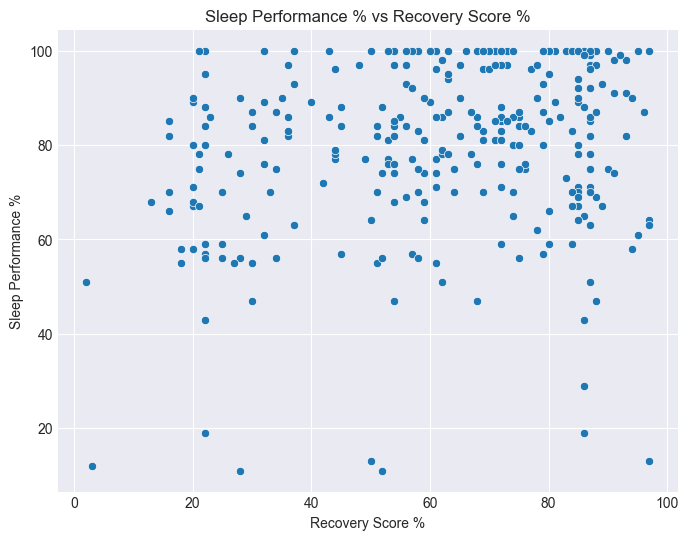

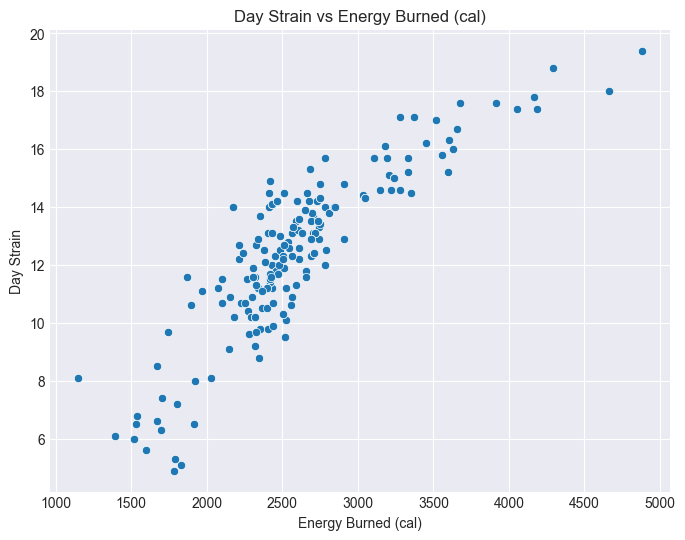

In [12]:
# merge data

# Merging datasets based on date for Sleep Quality Prediction and Recovery Analysis

phys_cycles['date'] = phys_cycles['Cycle start time'].dt.date
sleeps['date'] = sleeps['Cycle start time'].dt.date
workouts['date'] = workouts['Cycle start time'].dt.date
journal_entries['date'] = journal_entries['Cycle start time'].dt.date

sleep_merged = pd.merge(sleeps, phys_cycles, on='date', suffixes=('_sleep', '_phys'))

recovery_merged = pd.merge(workouts, phys_cycles, on='date', suffixes=('_workout', '_phys'))

print('Merged DataFrame for Sleep Quality Prediction head:')
print(sleep_merged.head())

print('\
Merged DataFrame for Recovery and Activity Impact Analysis head:')
print(recovery_merged.head())

plt.figure(figsize=(8,6))
sns.scatterplot(data=sleep_merged, x='Recovery score %', y='Sleep performance %_sleep')
plt.title('Sleep Performance % vs Recovery Score %')
plt.xlabel('Recovery Score %')
plt.ylabel('Sleep Performance %')
plt.show()

# For Recovery Analysis, plot Energy burned (cal) vs Day Strain from the physiological cycles
plt.figure(figsize=(8,6))
sns.scatterplot(data=recovery_merged, x='Energy burned (cal)_phys', y='Day Strain')
plt.title('Day Strain vs Energy Burned (cal)')
plt.xlabel('Energy Burned (cal)')
plt.ylabel('Day Strain')
plt.show()

In [ ]:
# Data Cleaning

important_sleep_cols = ['Sleep performance %_sleep', 'Recovery score %', 'Asleep duration (min)_sleep', 'In bed duration (min)_sleep']

# Let's see the missing values in these columns
print('Missing values in important sleep columns:')
print(sleep_merged[important_sleep_cols].isnull().sum())

# For simplicity, we'll drop rows that have missing critical data in the sleep_merged for now
sleep_merged_clean = sleep_merged.dropna(subset=important_sleep_cols)

# For Recovery and Activity Impact Analysis: We'll clean recovery_merged, focusing on key columns
important_recovery_cols = ['Energy burned (cal)_phys', 'Day Strain', 'Workout start time', 'Duration (min)']
print('\
Missing values in important recovery columns:')
print(recovery_merged[important_recovery_cols].isnull().sum())

# Drop rows with missing critical data for recovery analysis
recovery_merged_clean = recovery_merged.dropna(subset=important_recovery_cols)

print('\
Cleaned Sleep Quality DataFrame shape:', sleep_merged_clean.shape)
print('Cleaned Recovery Analysis DataFrame shape:', recovery_merged_clean.shape)

print('\
Data cleaning completed.')

# Show heads of cleaned dataframes
print('\
Head of Cleaned Sleep Quality DataFrame:')
print(sleep_merged_clean.head())

print('\
Head of Cleaned Recovery Analysis DataFrame:')
print(recovery_merged_clean.head())

Missing values in important sleep columns:
Sleep performance %_sleep      0
Recovery score %               1
Asleep duration (min)_sleep    0
In bed duration (min)_sleep    0
dtype: int64
Missing values in important recovery columns:
Energy burned (cal)_phys    0
Day Strain                  0
Workout start time          0
Duration (min)              0
dtype: int64
Cleaned Sleep Quality DataFrame shape: (293, 45)
Cleaned Recovery Analysis DataFrame shape: (294, 47)
Data cleaning completed.
Head of Cleaned Sleep Quality DataFrame:
  Cycle start time_sleep Cycle end time_sleep Cycle timezone_sleep  \
0    2025-04-07 22:56:24                  NaT            UTC-05:00   
1    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
2    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
3    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   
4    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   

    Sleep onset_sleep    Wake onset_sleep  S

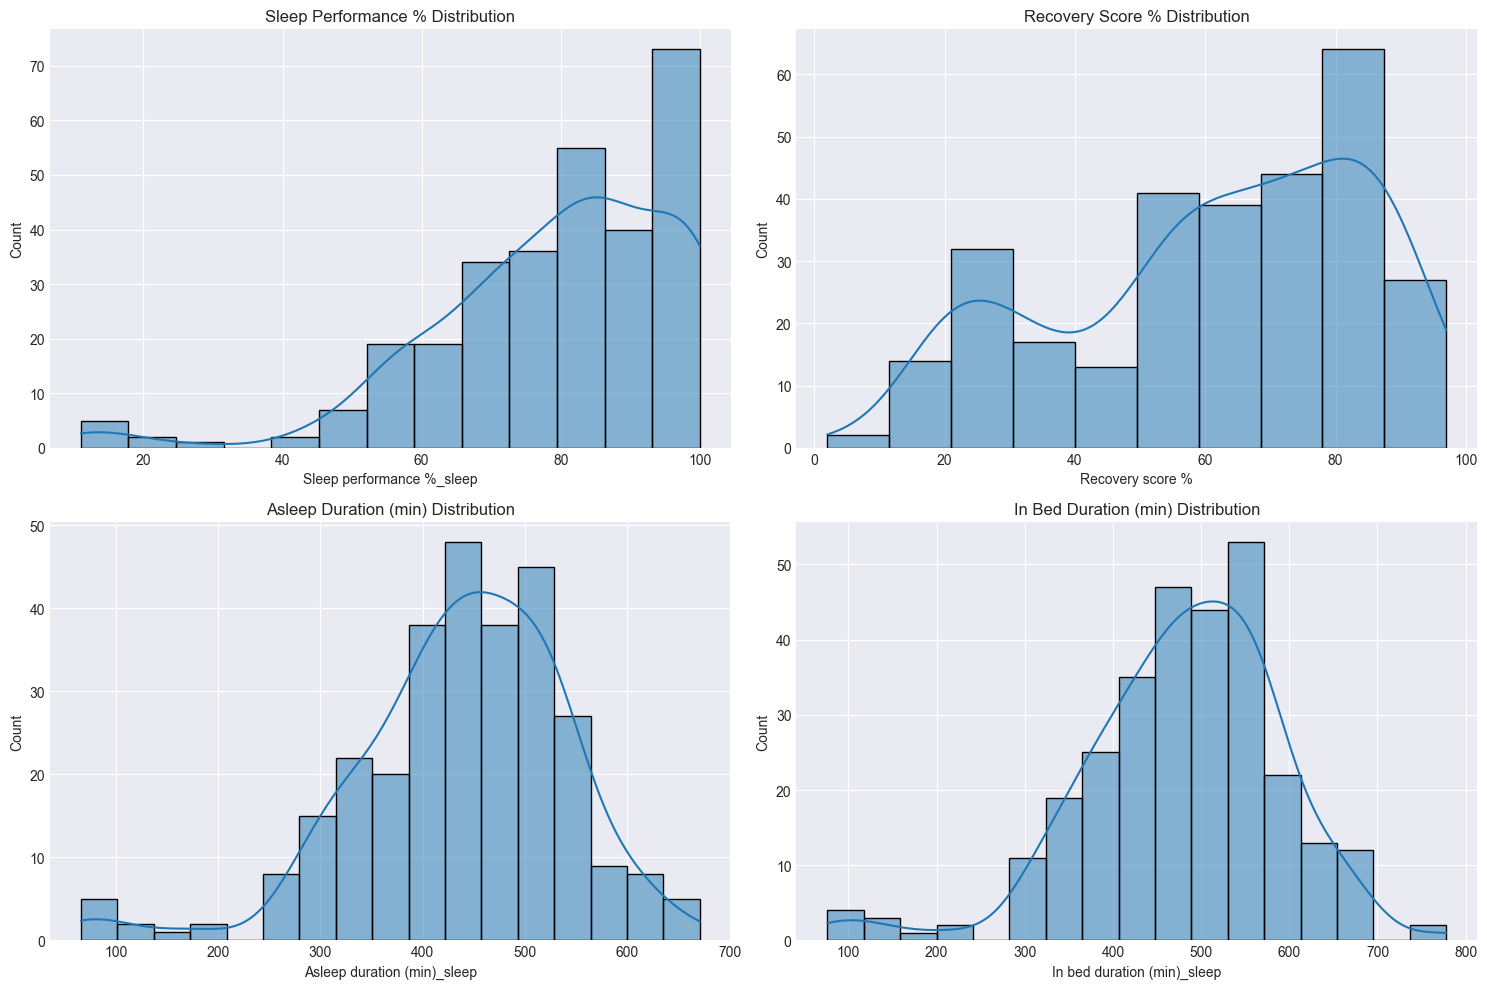

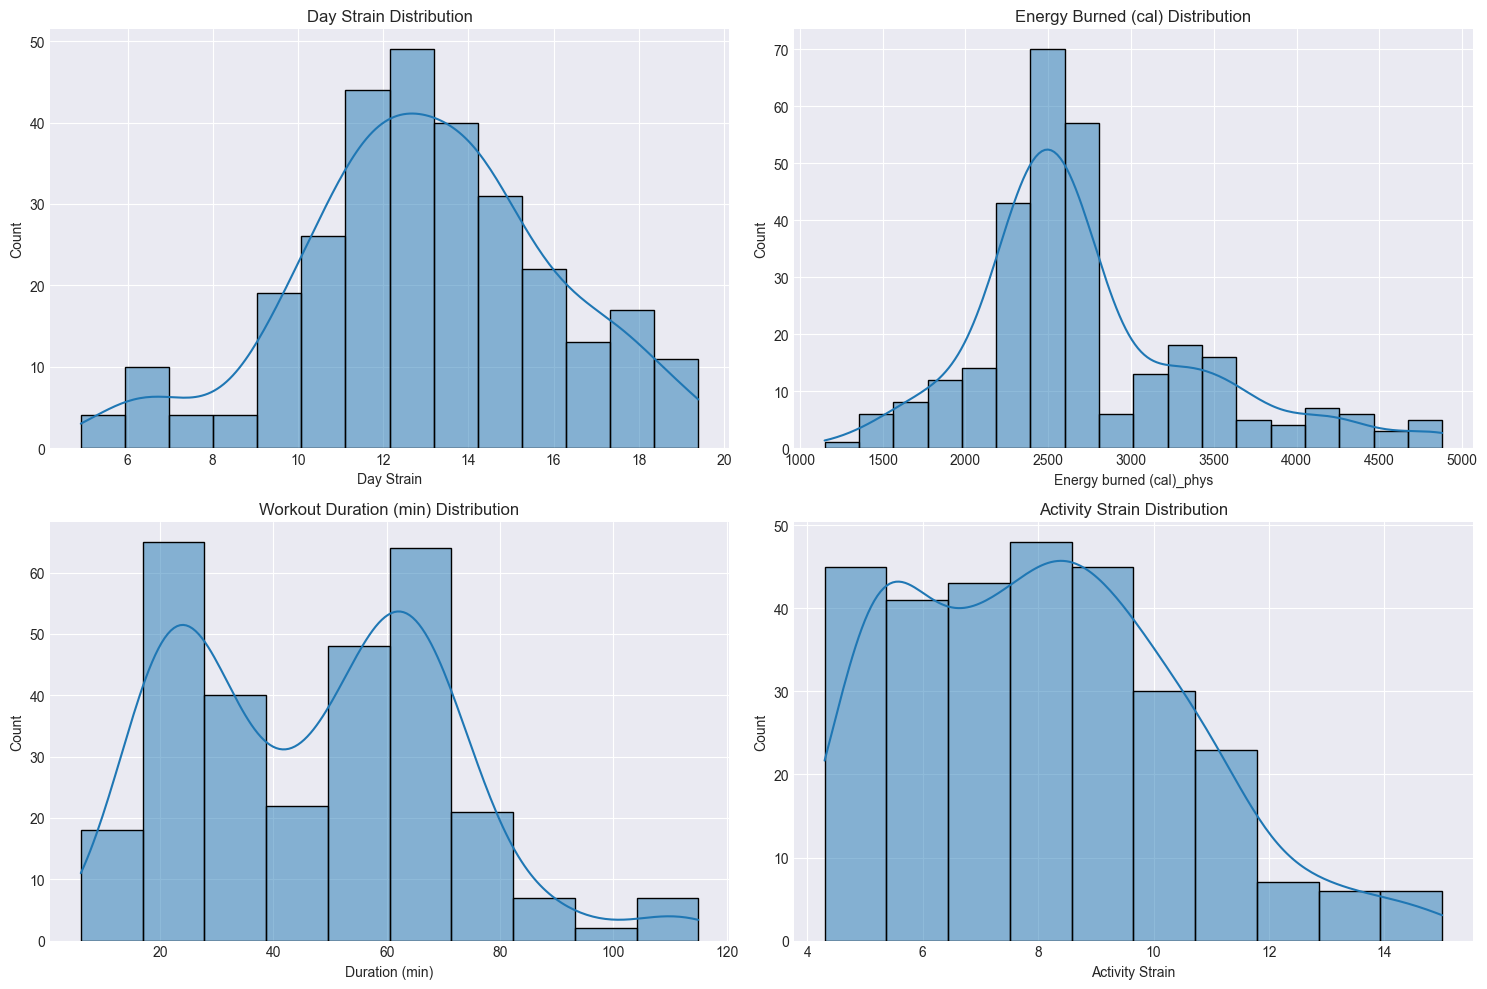

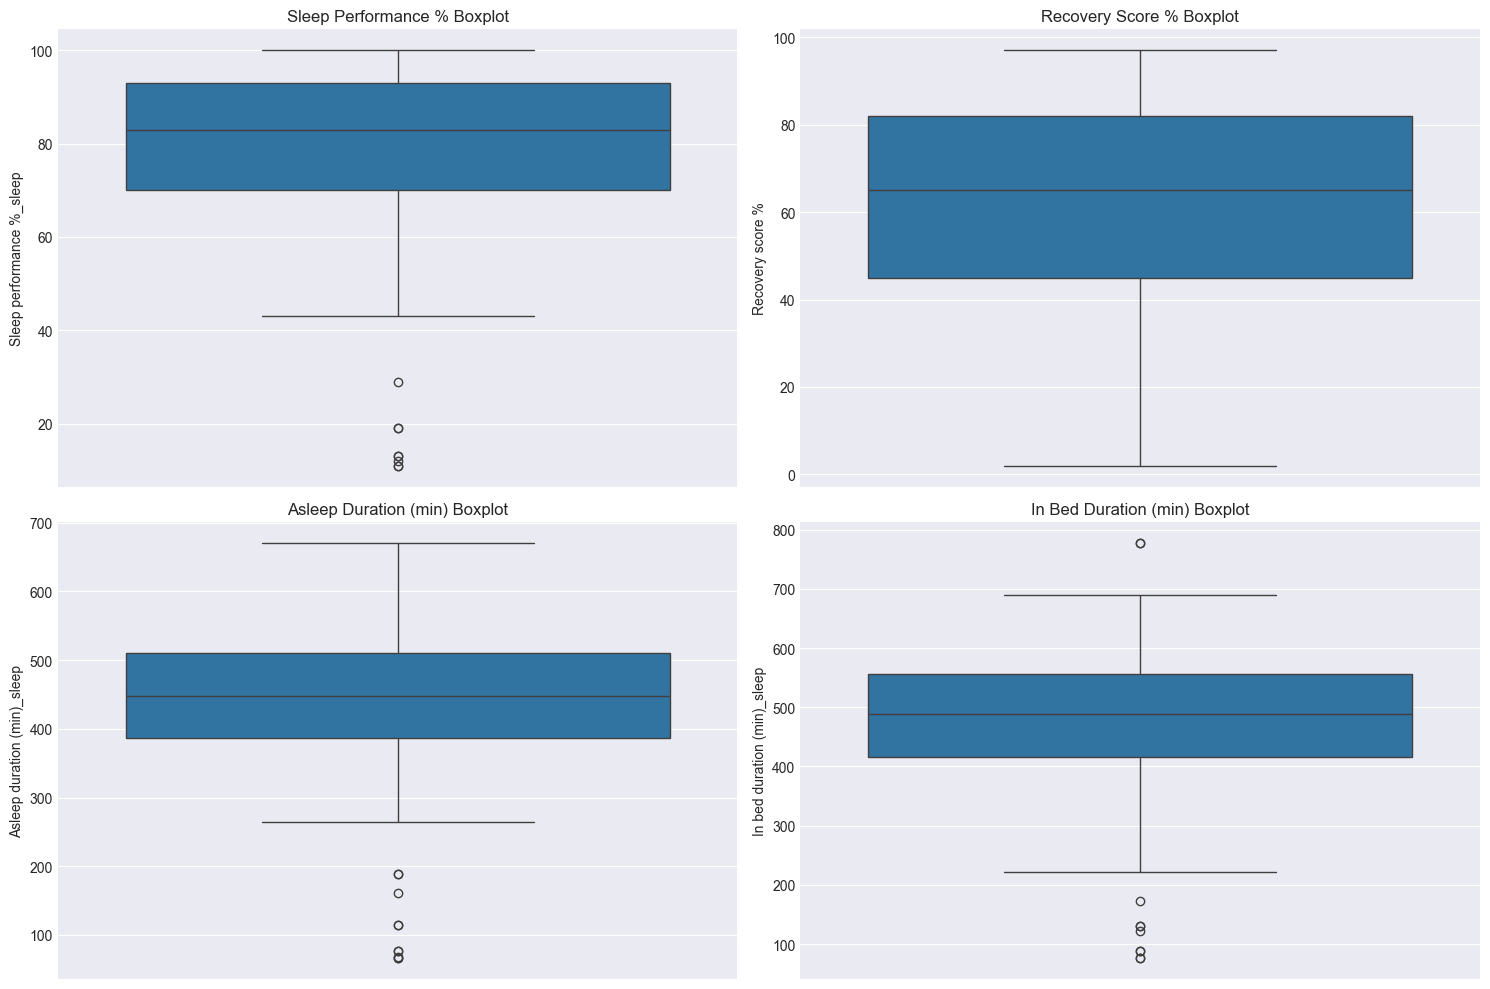

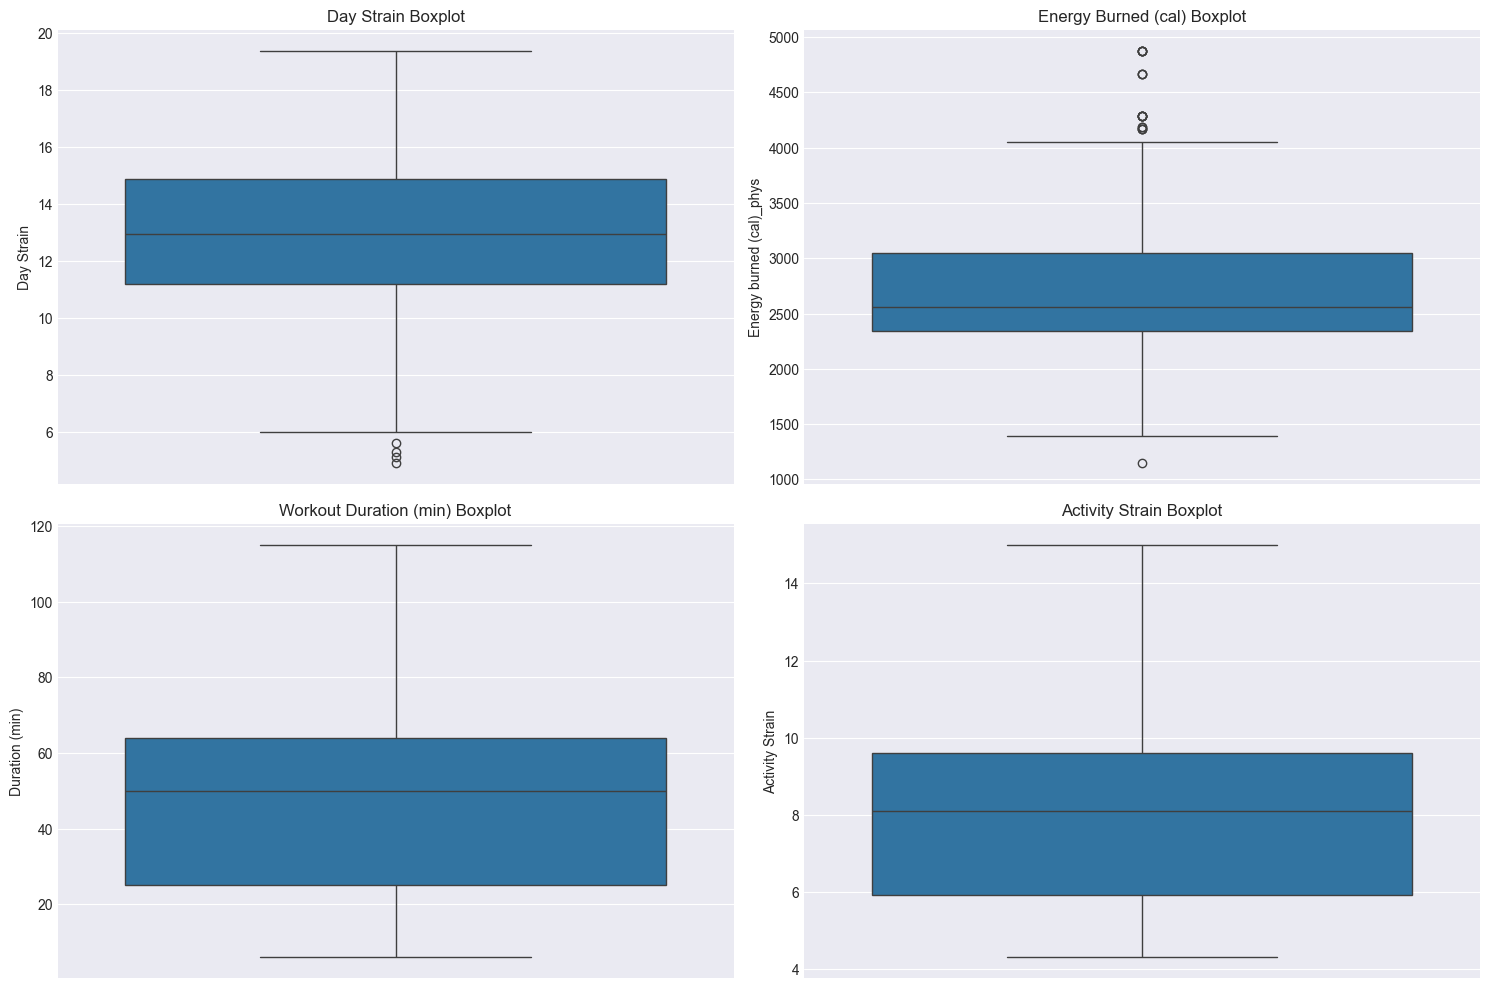

Distribution and outlier analysis completed.


In [14]:
# Let's check for outliers and handle them

import matplotlib.pyplot as plt
import seaborn as sns

# For Sleep Quality Prediction
# Let's look at the distribution of key variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(sleep_merged_clean['Sleep performance %_sleep'], kde=True)
plt.title('Sleep Performance % Distribution')

plt.subplot(2, 2, 2)
sns.histplot(sleep_merged_clean['Recovery score %'], kde=True)
plt.title('Recovery Score % Distribution')

plt.subplot(2, 2, 3)
sns.histplot(sleep_merged_clean['Asleep duration (min)_sleep'], kde=True)
plt.title('Asleep Duration (min) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(sleep_merged_clean['In bed duration (min)_sleep'], kde=True)
plt.title('In Bed Duration (min) Distribution')

plt.tight_layout()
plt.show()

# For Recovery and Activity Impact Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(recovery_merged_clean['Day Strain'], kde=True)
plt.title('Day Strain Distribution')

plt.subplot(2, 2, 2)
sns.histplot(recovery_merged_clean['Energy burned (cal)_phys'], kde=True)
plt.title('Energy Burned (cal) Distribution')

plt.subplot(2, 2, 3)
sns.histplot(recovery_merged_clean['Duration (min)'], kde=True)
plt.title('Workout Duration (min) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(recovery_merged_clean['Activity Strain'], kde=True)
plt.title('Activity Strain Distribution')

plt.tight_layout()
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=sleep_merged_clean['Sleep performance %_sleep'])
plt.title('Sleep Performance % Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(y=sleep_merged_clean['Recovery score %'])
plt.title('Recovery Score % Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(y=sleep_merged_clean['Asleep duration (min)_sleep'])
plt.title('Asleep Duration (min) Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(y=sleep_merged_clean['In bed duration (min)_sleep'])
plt.title('In Bed Duration (min) Boxplot')

plt.tight_layout()
plt.show()

# Check for outliers in recovery data
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=recovery_merged_clean['Day Strain'])
plt.title('Day Strain Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(y=recovery_merged_clean['Energy burned (cal)_phys'])
plt.title('Energy Burned (cal) Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(y=recovery_merged_clean['Duration (min)'])
plt.title('Workout Duration (min) Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(y=recovery_merged_clean['Activity Strain'])
plt.title('Activity Strain Boxplot')

plt.tight_layout()
plt.show()

print('Distribution and outlier analysis completed.')

In [15]:
# Re-create cleaned merged dataframes from sleep_merged and recovery_merged in case they are lost

# We'll assume sleep_merged and recovery_merged are already in memory from the previous merge cell

# Recreate sleep_merged_clean
important_sleep_cols = ['Sleep performance %_sleep', 'Recovery score %', 'Asleep duration (min)_sleep', 'In bed duration (min)_sleep']
sleep_merged_clean = sleep_merged.dropna(subset=important_sleep_cols)

# Recreate recovery_merged_clean
important_recovery_cols = ['Energy burned (cal)_phys', 'Day Strain', 'Workout start time', 'Duration (min)']
recovery_merged_clean = recovery_merged.dropna(subset=important_recovery_cols)

print('Re-created cleaned dataframes:')
print('Sleep merged clean shape:', sleep_merged_clean.shape)
print('Recovery merged clean shape:', recovery_merged_clean.shape)

# --------- Feature Engineering ---------

# 1. Create time-based features from datetime columns
# For Sleep Quality Prediction
sleep_merged_clean['sleep_onset_hour'] = sleep_merged_clean['Sleep onset_sleep'].dt.hour
sleep_merged_clean['sleep_onset_minute'] = sleep_merged_clean['Sleep onset_sleep'].dt.minute
sleep_merged_clean['wake_onset_hour'] = sleep_merged_clean['Wake onset_sleep'].dt.hour
sleep_merged_clean['wake_onset_minute'] = sleep_merged_clean['Wake onset_sleep'].dt.minute
sleep_merged_clean['day_of_week'] = sleep_merged_clean['Sleep onset_sleep'].dt.dayofweek
sleep_merged_clean['is_weekend'] = sleep_merged_clean['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# For Recovery Analysis
recovery_merged_clean['workout_start_hour'] = recovery_merged_clean['Workout start time'].dt.hour
recovery_merged_clean['workout_day_of_week'] = recovery_merged_clean['Workout start time'].dt.dayofweek
recovery_merged_clean['workout_is_weekend'] = recovery_merged_clean['workout_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 2. Create derived metrics
# For Sleep Quality Prediction: Calculate sleep efficiency as ratio of asleep duration to in bed duration
sleep_merged_clean['calculated_sleep_efficiency'] = sleep_merged_clean['Asleep duration (min)_sleep'] / sleep_merged_clean['In bed duration (min)_sleep'] * 100

# Calculate sleep stage percentages
sleep_merged_clean['light_sleep_pct'] = sleep_merged_clean['Light sleep duration (min)_sleep'] / sleep_merged_clean['Asleep duration (min)_sleep'] * 100
sleep_merged_clean['deep_sleep_pct'] = sleep_merged_clean['Deep (SWS) duration (min)_sleep'] / sleep_merged_clean['Asleep duration (min)_sleep'] * 100
sleep_merged_clean['rem_sleep_pct'] = sleep_merged_clean['REM duration (min)_sleep'] / sleep_merged_clean['Asleep duration (min)_sleep'] * 100

# For Recovery Analysis: Calculate workout intensity (Activity Strain / Duration)
recovery_merged_clean['workout_intensity'] = recovery_merged_clean['Activity Strain'] / recovery_merged_clean['Duration (min)']

# Calculate energy burned per minute during workout
recovery_merged_clean['energy_burned_per_min'] = recovery_merged_clean['Energy burned (cal)_workout'] / recovery_merged_clean['Duration (min)']

# Calculate heart rate zones distribution (weighted average of HR zones)
recovery_merged_clean['hr_zone_intensity'] = (
    recovery_merged_clean['HR Zone 1 %'] * 1 +
    recovery_merged_clean['HR Zone 2 %'] * 2 +
    recovery_merged_clean['HR Zone 3 %'] * 3 +
    recovery_merged_clean['HR Zone 4 %'] * 4 +
    recovery_merged_clean['HR Zone 5 %'] * 5
) / 100  

# 3. Handle outliers using capping (winsorization)
from scipy import stats

# For Sleep Quality Prediction
sleep_cols_to_cap = ['Asleep duration (min)_sleep', 'In bed duration (min)_sleep', 
                     'light_sleep_pct', 'deep_sleep_pct', 'rem_sleep_pct']

for col in sleep_cols_to_cap:
    lower_bound, upper_bound = sleep_merged_clean[col].quantile([0.01, 0.99])
    sleep_merged_clean[col + '_capped'] = sleep_merged_clean[col].clip(lower_bound, upper_bound)

# For Recovery Analysis
recovery_cols_to_cap = ['Energy burned (cal)_phys', 'Duration (min)', 'Activity Strain', 
                        'workout_intensity', 'energy_burned_per_min']

for col in recovery_cols_to_cap:
    lower_bound, upper_bound = recovery_merged_clean[col].quantile([0.01, 0.99])
    recovery_merged_clean[col + '_capped'] = recovery_merged_clean[col].clip(lower_bound, upper_bound)

# 4. Create lagged features for time series analysis
# For Sleep Quality Prediction - previous day's recovery score
sleep_merged_clean = sleep_merged_clean.sort_values('date')
sleep_merged_clean['prev_day_recovery_score'] = sleep_merged_clean['Recovery score %'].shift(1)

# For Recovery Analysis - previous day's sleep performance
recovery_merged_clean = recovery_merged_clean.sort_values('date')
recovery_merged_clean['prev_day_sleep_performance'] = recovery_merged_clean['Sleep performance %'].shift(1)

# 5. Create categorical features
# For Sleep Quality Prediction - categorize sleep onset time

def categorize_sleep_time(hour):
    if 20 <= hour <= 22:
        return 'Early'
    elif (22 < hour <= 24) or (0 <= hour < 1):
        return 'Normal'
    else:
        return 'Late'

sleep_merged_clean['sleep_time_category'] = sleep_merged_clean['sleep_onset_hour'].apply(categorize_sleep_time)

# For Recovery Analysis - categorize workout intensity

def categorize_workout_intensity(intensity):
    if intensity < 0.5:
        return 'Low'
    elif 0.5 <= intensity < 1.0:
        return 'Medium'
    else:
        return 'High'

recovery_merged_clean['workout_intensity_category'] = recovery_merged_clean['workout_intensity'].apply(categorize_workout_intensity)


Re-created cleaned dataframes:
Sleep merged clean shape: (293, 45)
Recovery merged clean shape: (294, 47)


/var/folders/b4/9m5gh79s6cqc4xm3wqn_4fmw0000gn/T/ipykernel_90873/3579510108.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_merged_clean['sleep_onset_hour'] = sleep_merged_clean['Sleep onset_sleep'].dt.hour
/var/folders/b4/9m5gh79s6cqc4xm3wqn_4fmw0000gn/T/ipykernel_90873/3579510108.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_merged_clean['sleep_onset_minute'] = sleep_merged_clean['Sleep onset_sleep'].dt.minute
/var/folders/b4/9m5gh79s6cqc4xm3wqn_4fmw0000gn/T/ipykernel_90873/3579510